# How to decorate axes in matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

## Prerequisites

Prepare data to be written

In [2]:
nsize = 2000
data = np.random.normal(size=nsize)
x = data.reshape(int(nsize/2),2)[:,0]
y = data.reshape(int(nsize/2),2)[:,1]

## Examples

Use pyplot.plot or pyplot.hist as you like

[]

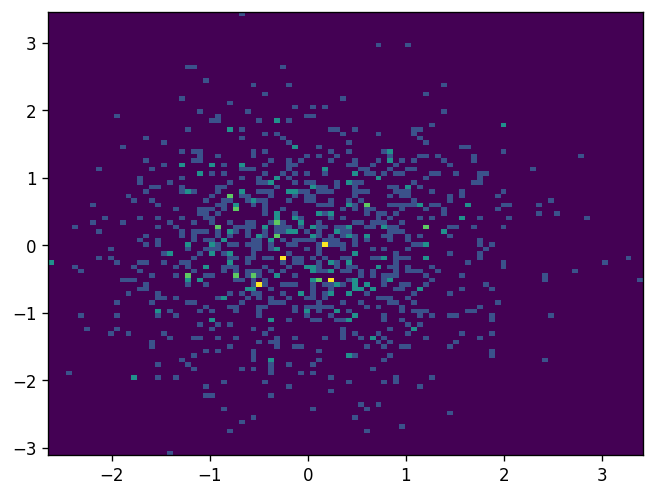

In [3]:
# Define as a function for repetition
def minimal_plot(isplot):
    # Change a type of plot
    isplot = False
    fig = plt.figure(dpi=120)
    ax = fig.add_subplot(111)
    if isplot:
        ax.plot(x,y,",")
    else:
        ax.hist2d(x,y,bins=100)
    return fig,ax

isplot = True
fig,ax = minimal_plot(isplot)
ax.plot()

### If you want to change how frequent ticks are, simple option

[]

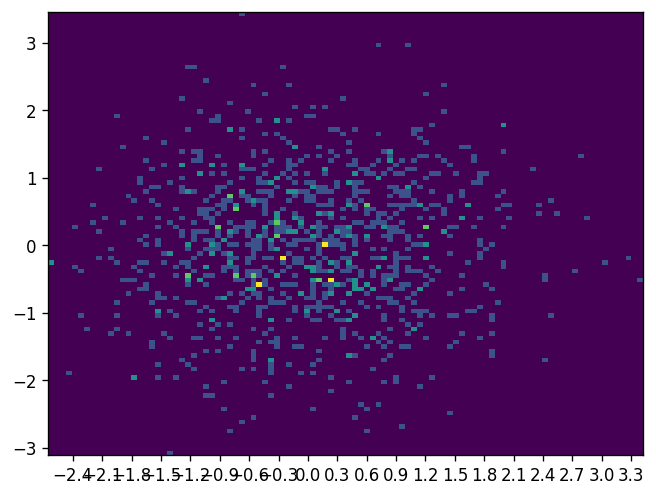

In [4]:
fig,ax = minimal_plot(isplot)

# Change major or minor scale on axes, the numbers will be rounded 
ax.xaxis.set_major_locator(ticker.MultipleLocator(.3))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(.1))


ax.plot()

### If you change ticks position more directly

[]

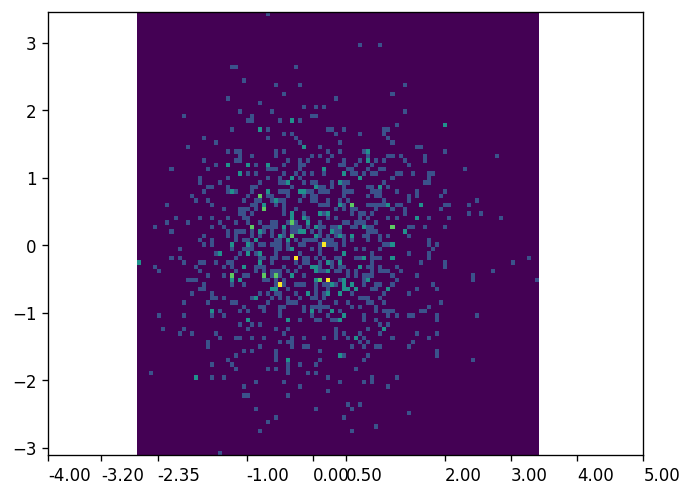

In [5]:
fig,ax = minimal_plot(isplot)

# Put ticks and labels specific positions
# and show as rounded float in ticks
pos = [-4,-3.2,-2.345,-1,0,0.5,2,3,4,5]
# ticks position
ax.set_xticks(pos)
# tick's label
ax.set_xticklabels([f"{i:.2f}" for i in pos])
# relative position of the labels
for l in ax.get_xticklabels():
    l.set_ha('left')

ax.plot()

### Adding another axis on your plot

[]

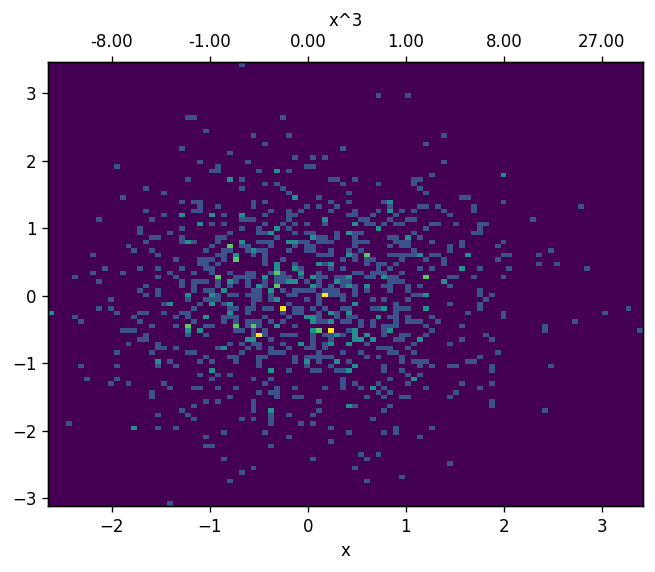

In [6]:
fig,ax = minimal_plot(isplot)
ax.set_xlabel('x')
# You can play with following lines
#ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
#ax.set_xlim(-5,5)

# Create new axis on the top of the plot
ax2 = ax.twiny()
# Copy tick positions of the original one
new_tick_locations = ax.get_xticks()

# Give the location of the ticks
ax2.set_xticks(new_tick_locations)
# And set a range, must be done after setting the location
ax2.set_xlim(ax.get_xlim())
# At last, give the labels as you like
ax2.set_xticklabels([f"{np.power(i,3):.2f}" for i in new_tick_locations])
ax2.set_xlabel('x^3')
ax.plot()

### Case 2: show a un-linear scale axis

[]

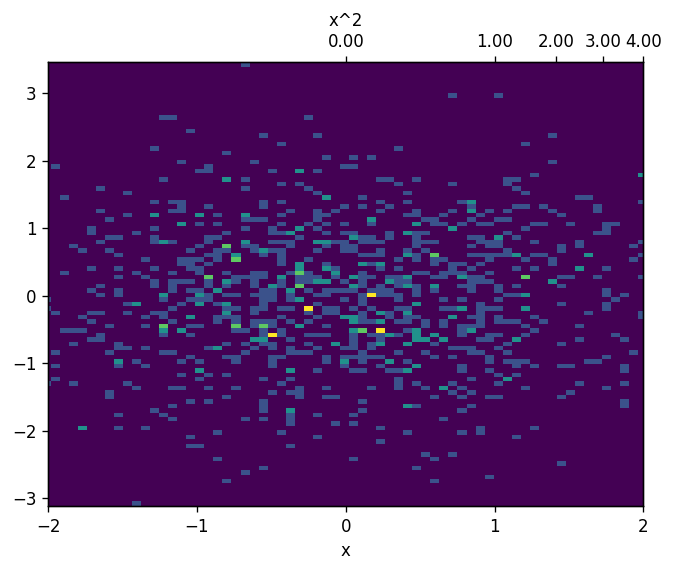

In [7]:
fig,ax = minimal_plot(isplot)
ax.set_xlabel('x')
# You can play with following lines
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlim(-2,2)

# Create new axis on the top of the plot
ax2 = ax.twiny()
# Copy tick positions of the original one
new_tick_locations = np.arange(0,5,1)

# Give the location of the ticks, give inverse function which you want to show
ax2.set_xticks(np.sqrt(new_tick_locations))
# And set a range, must be done after setting the location
ax2.set_xlim(ax.get_xlim())
# At last, give the labels as you like
ax2.set_xticklabels([f"{i:.2f}" for i in new_tick_locations])
ax2.set_xlabel('x^2')
ax.plot()